In [81]:
f = open("text1.txt","r")
content = f.read()
print(content)
path_online_source = "summarized_from_online_source.txt"
path_model_source = "summary_from_model.txt"
text_path = "text1.txt"

Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to intelligence of humans and other animals. Example tasks in which this is done include speech recognition, computer vision, translation between (natural) languages, as well as other mappings of inputs.
AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), automated decision-making, and competing at the highest level in strategic game systems (such as chess and Go).
As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect. For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
Artificial intelligence w

In [82]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
# Tokenizing the text

stopWords = set(stopwords.words("english"))
words = word_tokenize(content)
print(stopWords)
print()
print(words)

{'won', 'an', 'off', 'having', 'but', 'and', 'down', 'that', 'has', 'do', 'd', "isn't", 'so', 'why', 'being', 'all', 'can', 'their', 'if', "wouldn't", 'own', 'doesn', 'at', 'below', 'there', 'once', 'its', 'until', 'of', "aren't", 'about', 'the', 'hasn', "wasn't", "haven't", 'mightn', "you've", 'she', 'themselves', 'weren', 'same', 'did', 'your', 'will', 'doing', 'they', "mustn't", 'any', 'then', 'had', 'some', 'or', 'was', 'he', 't', 'should', 'those', 'both', 'me', "shouldn't", "that'll", "didn't", 'does', 'out', 'm', 'hers', 'ours', 'is', 'him', 'only', 'needn', 'are', 'as', 'each', 'this', "don't", 'couldn', "you're", 's', 'myself', 'yours', 'after', 'here', 'for', 're', 'on', "hadn't", "couldn't", "she's", 'very', "should've", 'you', 'during', 'further', 'other', 'i', 'nor', 'have', 'don', 'to', 'not', 'no', 'them', 'through', 'be', 'again', 'against', 'wasn', 'haven', 'while', 'whom', 'under', 'ourselves', 'herself', 'our', 'wouldn', 'my', 'his', 'over', 'few', 'hadn', "won't", '

In [84]:
# Creating a frequency table to keep the 
# score of each word
   
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

In [85]:
print(freqTable)

{'artificial': 5, 'intelligence': 9, '(': 10, 'ai': 14, ')': 10, 'demonstrated': 1, 'machines': 2, ',': 50, 'opposed': 1, 'humans': 1, 'animals': 1, '.': 17, 'example': 1, 'tasks': 2, 'done': 1, 'include': 3, 'speech': 2, 'recognition': 2, 'computer': 3, 'vision': 1, 'translation': 1, 'natural': 2, 'languages': 1, 'well': 1, 'mappings': 1, 'inputs': 1, 'applications': 1, 'advanced': 1, 'web': 1, 'search': 3, 'engines': 1, 'e.g.': 2, 'google': 1, 'recommendation': 1, 'systems': 2, 'used': 1, 'youtube': 1, 'amazon': 1, 'netflix': 1, 'understanding': 1, 'human': 3, 'siri': 1, 'alexa': 1, 'self-driving': 1, 'cars': 1, 'waymo': 1, 'generative': 1, 'creative': 1, 'tools': 2, 'chatgpt': 1, 'art': 1, 'automated': 1, 'decision-making': 1, 'competing': 1, 'highest': 1, 'level': 1, 'strategic': 1, 'game': 1, 'chess': 1, 'go': 1, 'become': 3, 'increasingly': 1, 'capable': 1, 'considered': 2, 'require': 1, '``': 3, "''": 3, 'often': 1, 'removed': 1, 'definition': 1, 'phenomenon': 1, 'known': 2, 'ef

In [86]:
# Creating a dictionary to keep the score of each sentence
sentences = sent_tokenize(content)
sentenceValue = dict()
   
for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq
   

In [87]:
print(sentenceValue)


{'Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to intelligence of humans and other animals.': 128, 'Example tasks in which this is done include speech recognition, computer vision, translation between (natural) languages, as well as other mappings of inputs.': 110, 'AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), automated decision-making, and competing at the highest level in strategic game systems (such as chess and Go).': 148, 'As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.': 112, 'For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine tec

In [88]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
   

In [89]:
# Average value of a sentence from the original text
   
average = int(sumValues / len(sentenceValue))
   
# Storing sentences into our summary.
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence
print(summary)

 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to intelligence of humans and other animals. AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), automated decision-making, and competing at the highest level in strategic game systems (such as chess and Go). Artificial intelligence was founded as an academic discipline in 1956, and in the years since it has experienced several waves of optimism, followed by disappointment and the loss of funding (known as an "AI winter"), followed by new approaches, success, and renewed funding. To solve these problems, AI researchers have adapted and integrated a wide range of problem-solving techniques, including search and mathematical optimization, formal logic, artificial neural networks, and met

In [90]:
len(summary)

1294

In [91]:
import spacy

In [92]:
nlp = spacy.load("en_core_web_sm")

In [93]:
doc = nlp(summary)

In [94]:
print(doc)

 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to intelligence of humans and other animals. AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), automated decision-making, and competing at the highest level in strategic game systems (such as chess and Go). Artificial intelligence was founded as an academic discipline in 1956, and in the years since it has experienced several waves of optimism, followed by disappointment and the loss of funding (known as an "AI winter"), followed by new approaches, success, and renewed funding. To solve these problems, AI researchers have adapted and integrated a wide range of problem-solving techniques, including search and mathematical optimization, formal logic, artificial neural networks, and met

In [95]:
summary_length = len(doc)
print(summary_length)

239


In [96]:

#reading summary obtained from online sources
with open (path_online_source, "r") as f:
    data = f.read()



In [97]:
# summarized = nlp(data)

In [98]:
print(data)

AI is the intelligence demonstrated by machines, as opposed to humans and other animals. Examples of AI tasks include speech recognition, computer vision, translation between languages, and other mappings of inputs. AI applications include advanced web search engines, recommendation systems, understanding human speech, self-driving cars, generative or creative tools, automated decision-making, and competing at the highest level in strategic game systems. AI was founded in 1956 and has experienced several waves of optimism, followed by disappointment and the loss of funding, followed by new approaches, success, and renewed funding. AI research has tried and discarded many different approaches, including simulating the brain, modeling human problem solving, formal logic, large databases of knowledge, and imitating animal behavior.

AI research has been dominated by highly mathematical and statistical machine learning in the first decades of the 21st century. It has been successful in sol

In [99]:
f.close()

In [100]:
summarized = nlp(data)

In [101]:
print(summarized)

AI is the intelligence demonstrated by machines, as opposed to humans and other animals. Examples of AI tasks include speech recognition, computer vision, translation between languages, and other mappings of inputs. AI applications include advanced web search engines, recommendation systems, understanding human speech, self-driving cars, generative or creative tools, automated decision-making, and competing at the highest level in strategic game systems. AI was founded in 1956 and has experienced several waves of optimism, followed by disappointment and the loss of funding, followed by new approaches, success, and renewed funding. AI research has tried and discarded many different approaches, including simulating the brain, modeling human problem solving, formal logic, large databases of knowledge, and imitating animal behavior.

AI research has been dominated by highly mathematical and statistical machine learning in the first decades of the 21st century. It has been successful in sol

In [102]:
online_length = len(summarized)
print(online_length)

322


In [103]:
import numpy as np 
import matplotlib.pyplot as plt 

In [104]:
x =[online_length]

In [105]:
y = [summary_length]

In [106]:
X_axis = np.arange(1)

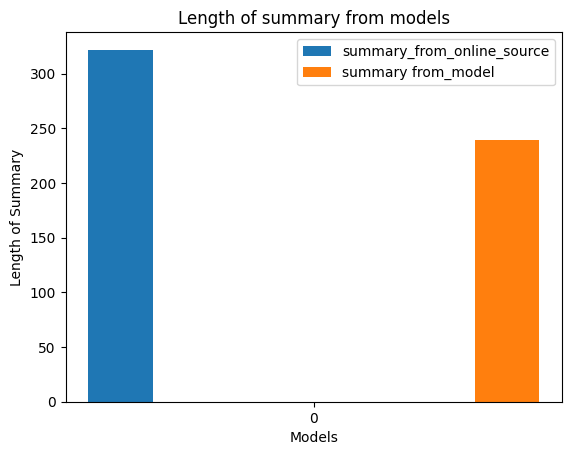

In [107]:
plt.bar(X_axis - 0.3, x, 0.1, label = 'summary_from_online_source')
plt.bar(X_axis + 0.3, y, 0.1, label = 'summary from_model')
plt.xticks(X_axis)
plt.xlabel("Models")
plt.ylabel("Length of Summary")
plt.title("Length of summary from models")
plt.legend()
plt.show()

In [108]:
import math
import string
import sys
  

In [109]:
# reading the text file
# This function will return a list of the lines of text  in the file.
def read_file(filename): 
      
    try:
        with open(filename, 'r') as f:
            data = f.read()
        return data
      
    except IOError:
        print("Error opening or reading input file: ", filename)
        sys.exit()

In [110]:
# splitting the text lines into words
# translation table is a global variable mapping upper case to lower case and punctuation to spaces
translation_table = str.maketrans(string.punctuation+string.ascii_uppercase,
                                     " "*len(string.punctuation)+string.ascii_lowercase)

In [111]:
# returns a list of the words in the file
def get_words_from_line_list(text): 
      
    text = text.translate(translation_table)
    word_list = text.split()
      
    return word_list

In [112]:
# counts frequency of each word returns a dictionary which maps the words to  their frequency.
def count_frequency(word_list): 
      
    D = {}
      
    for new_word in word_list:
          
        if new_word in D:
            D[new_word] = D[new_word] + 1
              
        else:
            D[new_word] = 1
              
    return D

In [113]:
# returns dictionary of (word, frequency) pairs from the previous dictionary.
def word_frequencies_for_file(filename): 
      
    line_list = read_file(filename)
    word_list = get_words_from_line_list(line_list)
    freq_mapping = count_frequency(word_list)
  
    print("File", filename, ":", )
    print(len(line_list), "lines, ", )
    print(len(word_list), "words, ", )
    print(len(freq_mapping), "distinct words")
  
    return freq_mapping
  

In [114]:
# returns the dot product of two documents
def dotProduct(D1, D2): 
    Sum = 0.0
      
    for key in D1:
          
        if key in D2:
            Sum += (D1[key] * D2[key])
              
    return Sum

In [115]:
# returns the angle in radians between document vectors
def vector_angle(D1, D2): 
    numerator = dotProduct(D1, D2)
    denominator = math.sqrt(dotProduct(D1, D1)*dotProduct(D2, D2))
      
    return math.acos(numerator / denominator)

In [116]:
def documentSimilarity(filename_1, filename_2):
    
    sorted_word_list_1 = word_frequencies_for_file(filename_1)
    sorted_word_list_2 = word_frequencies_for_file(filename_2)
    distance = vector_angle(sorted_word_list_1, sorted_word_list_2)
      
    print("The distance between the documents is: % 0.6f (radians)"% distance)
    
  
    return [len(sorted_word_list_1),len(sorted_word_list_2)]
      

In [117]:
with open (path_model_source, "a") as f:
    f.write(summary)

In [118]:
f.close()

In [119]:
word = documentSimilarity(path_model_source, path_online_source)

File summary_from_model.txt :
5176 lines, 
748 words, 
130 distinct words
File summarized_from_online_source.txt :
1933 lines, 
274 words, 
179 distinct words
The distance between the documents is:  0.605326 (radians)


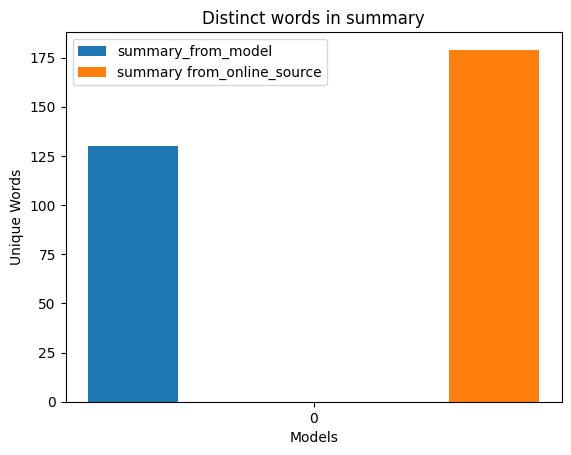

In [120]:
plt.bar(X_axis - 0.4, word[0], 0.2, label = 'summary_from_model')
plt.bar(X_axis + 0.4, word[1], 0.2, label = 'summary from_online_source')
plt.xticks(X_axis)
plt.xlabel("Models")
plt.ylabel("Unique Words")
plt.title("Distinct words in summary")
plt.legend()
plt.show()